# Surface energy exchange

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

The dataset that we will be using is here: Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Monthlies/surface_gauss/catalog.html

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

### Read latent and sensible heat fluxes data

In [14]:
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/surface_gauss/lhtfl.sfc.mon.ltm.nc'
file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/surface_gauss/shtfl.sfc.mon.ltm.nc'
with xr.open_dataset(file1) as ds1:
    #print(ds1)
    lh=ds1.lhtfl # Unit is W/m2
    print(lh)
with xr.open_dataset(file2) as ds2:
    #print(ds2)
    sh=ds2.shtfl # Unit is W/m2
    print(sh)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.DataArray 'lhtfl' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/13)
    long_name:     Long Term Mean Monthly Mean of Latent Heat Net Flux
    valid_range:   [-2000.  2000.]
    units:         W/m^2
    precision:     1
    GRIB_id:       121
    GRIB_name:     LHTFL
    ...            ...
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-28.010231 388.98312 ]
    _ChunkSizes:   [  1  94 192]
<xarray.DataArray 'shtfl' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


### Calculate annual averages

In [16]:
lh_ann=lh.mean("time") # annual average latent heat flux
sh_ann=sh.mean("time") # annual average latent heat flux

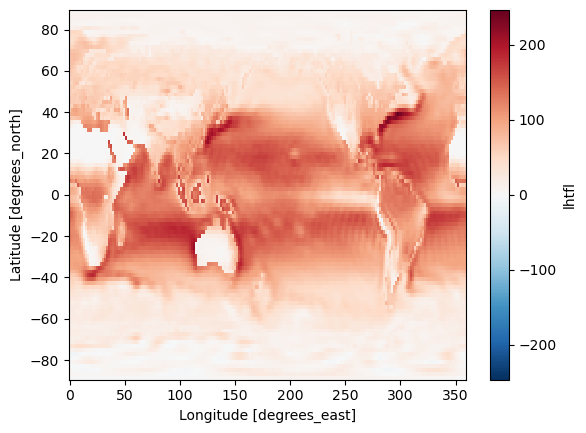

In [17]:
## Latent heat flux
# plot annual average latent heat flux
lh_ann.plot()

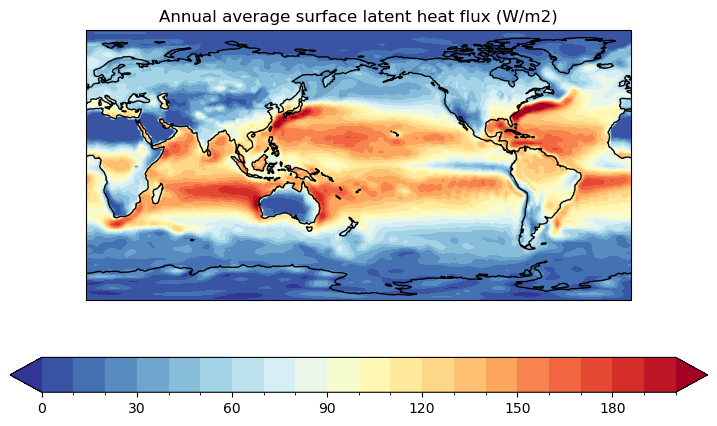

In [10]:
# Make a prettier plot
lev1=np.arange(0,210,10)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=lh_ann.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Annual average surface latent heat flux (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 1
Explain the distribution of annual average latent heat flux at the surface.

#### Plot January latent heat flux.

In [ ]:
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=lh_ann.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Annual average surface latent heat flux (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 2
Plot July latent heat flux.

### Problem 3
Explain the differences in the distribution of January and July average latent heat fluxes.

## Sensible heat flux

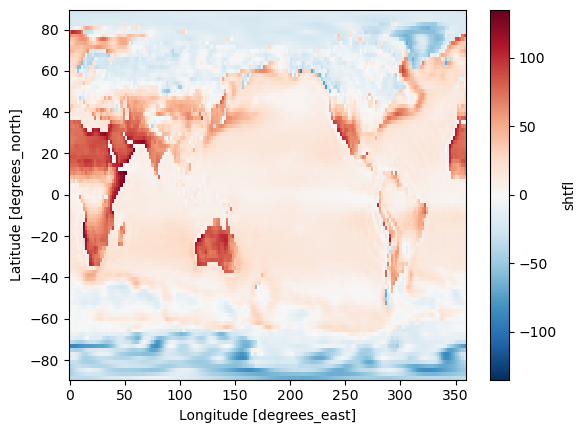

In [18]:
## Latent heat flux
# plot annual average sensible heat flux
sh_ann.plot()

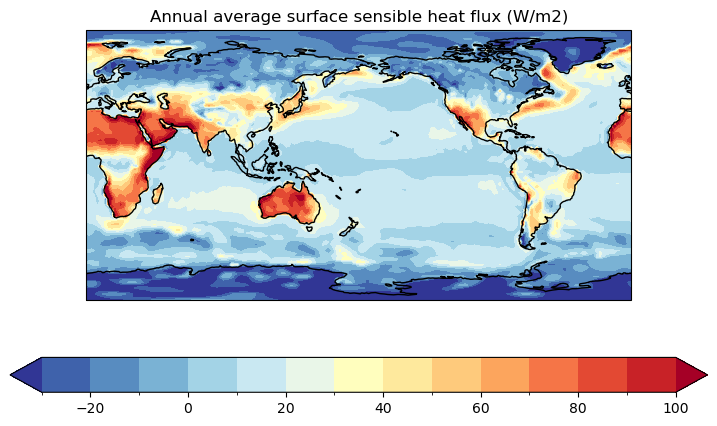

In [26]:
# Make a prettier plot
lev1=np.arange(-30,110,10)  # Note that the levels are different from the levels for the latent heat flux

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=sh_ann.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Annual average surface sensible heat flux (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 4
Explain the distribution of annual average sensible heat flux at the surface.

#### Plot January sensible heat flux.

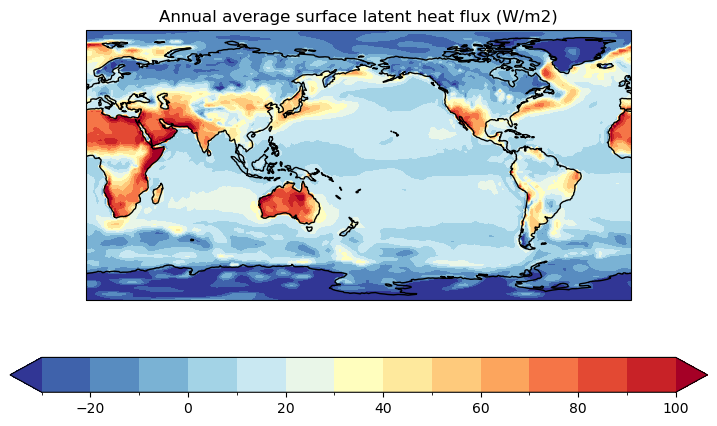

In [27]:
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=sh_ann.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Annual average surface latent heat flux (W/m2)')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 5
Plot July sensible heat flux.

### Problem 6
Explain the differences in the distribution of January and July average sensible heat fluxes.

### Problem 7
Explain the differences in the distribution of the sensible and latent heat fluxes.